# Chapter 8 - Dimensionality Reduction

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine, fetch_mldata
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [4]:
wine_data = load_wine()
X, y = wine_data['data'], wine_data['target']

## Principal Component Analysis 

In [5]:
from sklearn.decomposition import PCA

In [6]:
pca = PCA()
X2D = pca.fit_transform(X)
pca.explained_variance_ratio_

array([9.98091230e-01, 1.73591562e-03, 9.49589576e-05, 5.02173562e-05,
       1.23636847e-05, 8.46213034e-06, 2.80681456e-06, 1.52308053e-06,
       1.12783044e-06, 7.21415811e-07, 3.78060267e-07, 2.12013755e-07,
       8.25392788e-08])

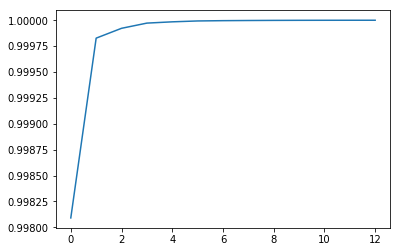

In [7]:
scale_range = range(len(pca.explained_variance_ratio_))
plt.plot(scale_range, np.cumsum(pca.explained_variance_ratio_))

### PCA for Compression 

In [8]:
data_mnist = fetch_mldata('MNIST original')

In [9]:
pca = PCA(n_components=0.95)
X_train, X_test, y_train, y_test = train_test_split(data_mnist['data'], data_mnist['target'], test_size=0.2)
pca.fit(X_train)
X_pca = pca.transform(X_train)
y_pca = y_train

In [10]:
rf = RandomForestClassifier(max_features='sqrt', n_estimators=1000, n_jobs=-1)
rf.fit(X_pca, y_pca)
rf.score(pca.transform(X_test), y_test)

0.9522142857142857

### Incremental PCA 

In [11]:
from sklearn.decomposition import IncrementalPCA

In [12]:
n_batches = 100
inc_pca = IncrementalPCA(n_components=154)

for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_batch)

### Randomized PCA 

In [14]:
rnd_pca = PCA(n_components=154, svd_solver='randomized')
X_reduced = rnd_pca.fit_transform(X_train)

### Kernel PCA 

In [15]:
from sklearn.decomposition import KernelPCA

In [16]:
rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.4)
X_reduced = rbf_pca.fit_transform(X)

## LLE 

In [17]:
from sklearn.manifold import LocallyLinearEmbedding

In [18]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced = lle.fit_transform(X)